In [2]:
#STEP 1: Import packages
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import mySQL option 1
import mysql.connector

#import mySQL option 2
#import pymysql.cursors #only try this after running the "python -m pip install PyMySQL" 

In [3]:
#STEP 2: Setting the cnx
#cnx for option 1
cnx = mysql.connector.connect(user='epa1351g14', password='xgt65RR##', database='epa1351group14')
#cnx for option 2
#cnx = pymysql.connect(user='epa1351g14', password='xgt65RR##', database='epa1351group14')

Definitions for dataframes

In [4]:
#STEP 3a: Definition for reading in dataframe of segmenttraveltimes
def read_stt_sql(cnx):
    cursor = cnx.cursor()
   
    query_stt = ("SELECT * from segmenttraveltimes ORDER BY RowID2")
    segmenttraveltimes = pd.read_sql(query_stt,cnx)
    
    return segmenttraveltimes

In [5]:
#STEP 3b: Definition for reading in dataframe of brokenbridges
def read_bb_sql(cnx):
    cursor = cnx.cursor()

    query_bb = ("SELECT * from brokenbridges ORDER BY RowID3")
    brokenbridges = pd.read_sql(query_bb,cnx)
    
    return brokenbridges

Definitions for visualizations

In [ ]:
LN1 = list()
LDC = list()
N1DC = pd.read_csv('Data_clean_N1_Dhaka_Chittagong_new.csv')
LRPsDhakaChittagong = list(N1DC.LRPName.unique()

In [14]:
def movingaverage(segmenttraveltimes):
    dfma = segmenttraveltimes[segmenttraveltimes.LRPName.isin(LRPsDhakaChittagong)]
    LN1.append(segmenttraveltimes.SegTime.sum()/len(segmenttraveltimes))
    LDC.append(dfma.SegTime.sum()/len(dfma))
    LN1x = list(range(1,len(LN1)+1))
    LDCx = list(range(1,len(LDC)+1))

    plt.plot(LN1x, LN1)
    plt.plot(LDCx, LDC)
    plt.show()
    return x,y

In [ ]:
def vehicletypes(segmenttraveltimes):
    segmenttraveltimes.groupby(['LRPName','VehicleType'])['SegTime'].sum().unstack().plot(kind='bar', stacked=True)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()
    return

In [ ]:
def 
segments = segmenttraveltimes.LRPName.unique()
vehicles = segmenttraveltimes.VehicleType.unique()
segmentdict = {}
for segment in segments:
   df = segmenttraveltimes[segmenttraveltimes.LRPName == segment]
   vehicledict = {}
   for vehicle in vehicles:
       df2 = df[df.VehicleType == vehicle]
       segtimepervehicle = df2.SegTime.sum()
       vehicledict[vehicle] = segtimepervehicle
   segmentdict[segment] = vehicledict
df = pd.DataFrame(segmentdict)
df.plot(kind="bar", stacked=True)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [ ]:
bridgesbrokendown = brokenbridges.BridgeID.unique()
bridges = pd.read_csv('Bridge_data_with_link_to_traffic.csv')
shape = gpd.read_file('bgd_admbnda_adm0_bbs_20180410/bgd_admbnda_adm0_bbs_20180410.shp')
bridges=bridges[bridges['road']=='N1']
# Make coordinates from the latitude and longitude
bridges['Coordinates'] = list(zip(bridges.lon, bridges.lat))
bridges['Coordinates'] = bridges['Coordinates'].apply(Point)
bridges = GeoDataFrame(bridges, geometry='Coordinates')
shape.crs = {'init': 'epsg:4326'}
bridges.crs = {'init': 'epsg:4326'}
fig, ax = plt.subplots(1, figsize=(3.5,7))
base = shape.plot(ax=ax, color='#DCDCDC')
bridges.plot(ax=base, marker='o', alpha=0.5, color = 'green', markersize = 1)
brokenbridges = bridges[bridges.LRPName.isin(bridgesbrokendown)]
brokenbridges.plot(ax=base, marker = 'o', alpha = 0.5, color = 'red', markersize = 100)
#bridges.plot(markersize=bridges['size'])
ax.set_title("Bridges broken down in red")

Definition for the updating visualisations

In [15]:
#STEP 5: Definition to update all the visualisations
def wait_for_sql():
    last_rowid = -1
    while True:
        #cnx for option 1
        cnx = mysql.connector.connect(user='epa1351g14', password='xgt65RR##', database='epa1351group14')
        #cnx for option 2
        #cnx = pymysql.connect(user='epa1351g14', password='xgt65RR##', database='epa1351group14')
        cursor = cnx.cursor()
        
        #selecting the latest row in hourlyupdate table
        query = ("SELECT * from hourlyupdate ORDER BY RowID1 DESC LIMIT 1")
        cursor.execute(query)
#for loop searching for a new row in the hourlyupdate table        
        for (RowID1, SimioHour) in cursor:
            if RowID1 > last_rowid:
                read_stt_sql(cnx)
                segmenttraveltimes = read_stt_sql(cnx)
                
                read_bb_sql(cnx)
                brokenbridges = read_bb_sql(cnx)
                
                movingaverage(segmenttraveltimes)
                last_rowid = RowID1
        time.sleep(1)

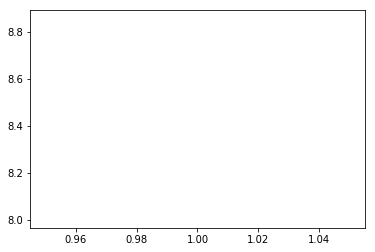

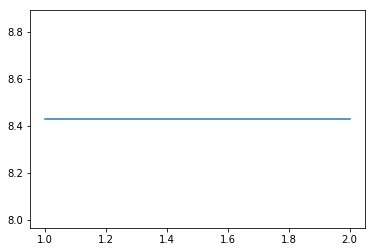

In [ ]:
wait_for_sql()